# Programming Assignment 5 - Support Vector Machines 
In this programming assignment, you would use Support Vector Machines and Logistic Regression
for a classification problem. We are going to compare performance of both the algorithms on the same dataset with different values of parameters like type of kernel used, type of regularization techniques used (ridge/lasso) etc.

Do the assignment carefully, by understanding the structure of the code.

# Instructions :
You have to write a small report in a pdf file. You can use bullet points to discuss your results for every function of the assignment.<br>
For example, for data1.csv dataset, write which method gave you the best accuracy using which value of the parameter.<br>
Do not write explainations, just discuss your results / observations point to point. 


In [869]:
# Importing the libraries to be used:
import numpy as np
from numpy import random as r
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, r2_score

In [870]:
def transform_and_split_data(data):
    X = data[:, :-1]
    y = data[:, -1]
    print(f'Original y hist: {np.histogram(y, range(int(y.max()) + 1))}')
    y = y - data[:, -1].min()
    y[y<=2] = 0.
    y[y==3] = 1.
    y[y>3] = 2.
    print(f'Current y hist: {np.histogram(y, [-0.5, 0.5, 1.5, 2.5])}')
    print(f'y min: {y.min()}, y max: {y.max()}')
    y_out_len = int(y.max()) + 1

    print(f'The shape of the wines dataset: {data.shape}')
    print(f'y[:10]:\n{y[:10]}')
    print(f'X[:10, :]:\n{X[:10, :]}')

    # Scale the dataset
    X_scale = StandardScaler()
    X = X_scale.fit_transform(X)
    print(print(f'ScaledX[:10, :]:\n{X[:10, :]}')) # Looking the new features after scaling

    #Split the data into training and test set.  60% training and %40 test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


    return X_train, y_train, X_test, y_test

In [871]:
def confusion_and_classification(y, y_hat):
    cm = confusion_matrix(y, y_hat, normalize='true')

    # Plot non-normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='winter')
    plt.show()

    cr = classification_report(y, y_hat, zero_division=0)
    # accuracy
    print(cr[: cr.find('accuracy') - 6])
    print(f'\t\t R2 Score: {r2_score(y, y_hat)}\n')

# Support Vector Machines (SVM)
Now we will use the same dataset and try to find a classifier using SVM.
For more information about svm classifier, check the given link.
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# SVM using Linear Kernel.

In [872]:
from sklearn import svm

# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_linear(c, X_train, y_train, X_test, y_test, acc_train_svm_linear, acc_test_svm_linear):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear = svm.SVC(probability=False, kernel='linear', C=c)
    
    # Fit the classifier on the training set
    svc_linear.fit(X_train, y_train)

    acc_train = svc_linear.score(X_train, y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    print(f'SVM - Linear, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_linear_train)

    acc_test = svc_linear.score(X_test, y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_linear_test)

# SVM using Radial Basis Function(RBF) Kernel.

In [873]:
# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_rbf(c, X_train, y_train, X_test, y_test, acc_train_svm_rbf, acc_test_svm_rbf):
    # Create an object of svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c, random_state=24)
    
    # Fit the classifier on the training set
    svc_rbf.fit(X_train, y_train)

    acc_train = svc_rbf.score(X_train, y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print(f'SVM - RBF, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_rbf_train)

    acc_test = svc_rbf.score(X_test, y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_rbf_test)

# SVM using Polynomial Kernel.
Note: SVM with polynomial kernel can be sometimes very slow. If that is the case, use smaller size of training set. Instead of all 600 training examples, use less (say 300).

In [874]:
def svm_polynomial(c, X_train, y_train, X_test, y_test, acc_train_svm_poly, acc_test_svm_poly):
    # Create an object of svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    # Fit the classifier on the training set
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(X_train, y_train)

    acc_train = svc_polynomial.score(X_train, y_train)
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print(f'SVM - Poly, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_poly_train)

    acc_test = svc_polynomial.score(X_test, y_test)
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_poly_test)

In [875]:
def train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly):
    # Linear
    acc_train_svm_linear = []
    acc_test_svm_linear = []
    # Call the above function i.e. logreg_model with different values of parameter 'c'.
    # c_svm_linear = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    for c in c_svm_linear:
        svm_linear(c, X_train, y_train, X_test, y_test, acc_train_svm_linear, acc_test_svm_linear)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_linear, acc_train_svm_linear, color='red', label='Training Accuracy')
    plt.plot(c_svm_linear, acc_test_svm_linear, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Linear - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Radial Basis Function
    acc_train_svm_rbf = []
    acc_test_svm_rbf = []
    # c_svm_rbf = [0.1, 1, 10, 100, 1000]
    for c in c_svm_rbf:
        svm_rbf(c, X_train, y_train, X_test, y_test, acc_train_svm_rbf, acc_test_svm_rbf)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_rbf, acc_train_svm_rbf, color='red', label='Training Accuracy')
    plt.plot(c_svm_rbf, acc_test_svm_rbf, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('RBF - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



    # # Poly
    acc_train_svm_poly = []
    acc_test_svm_poly = []
    # c_svm_poly = [0.1, 1, 10, 100, 1000]
    for c in c_svm_poly:
        svm_polynomial(c, X_train, y_train, X_test, y_test, acc_train_svm_poly, acc_test_svm_poly)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_poly, acc_train_svm_poly, color='red', label='Training Accuracy')
    plt.plot(c_svm_poly, acc_test_svm_poly, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Poly - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [876]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
data_red = df_red.to_numpy()

df_white = pd.read_csv('winequality-white.csv', sep=';')
data_white = df_white.to_numpy()

data_all = np.vstack((data_red, data_white))

rs = r.RandomState(42)
r.shuffle(data_red)
r.shuffle(data_white)
r.shuffle(data_all)

# Train Red Wines Data

In [877]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([744, 638, 217]), array([-0.5,  0.5,  1.5,  2.5]))
y min: 0.0, y max: 2.0
The shape of the wines dataset: (1599, 12)
y[:10]:
[2. 0. 0. 0. 0. 1. 2. 0. 0. 2.]
X[:10, :]:
[[ 6.1      0.4      0.16     1.8      0.069   11.      25.       0.9955
   3.42     0.74    10.1    ]
 [10.2      0.24     0.49     2.4      0.075   10.      28.       0.9978
   3.14     0.61    10.4    ]
 [ 9.3      0.715    0.24     2.1      0.07     5.      20.       0.9966
   3.12     0.59     9.9    ]
 [ 6.4      0.64     0.21     1.8      0.081   14.      31.       0.99689
   3.59     0.66     9.8    ]
 [ 7.6      0.43     0.29     2.1      0.075   19.      66.       0.99718
   3.4      0.64     9.5    ]
 [10.1      0.65     0.37     5.1      0.11    11.      65.       1.0026
   3.32     0.64    10.4    ]
 [10.7      0.35     0.53     2.6      0.07     5.      16.       0.9972
   3.15     0

SVM - Linear, Train Accuracy = 0.6387802971071149, C=0.06
Test Accuracy = 0.63125


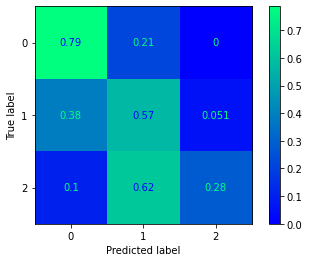

              precision    recall  f1-score   support

         0.0       0.67      0.79      0.72       145
         1.0       0.58      0.57      0.57       136
         2.0       0.61      0.28      0.39        39
		 R2 Score: 0.12685752665603223

SVM - Linear, Train Accuracy = 0.6379984362783424, C=0.0680892420526407
Test Accuracy = 0.63125


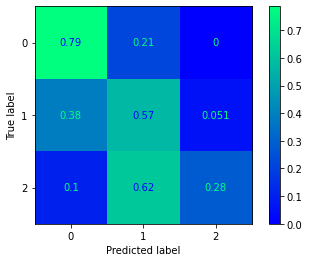

              precision    recall  f1-score   support

         0.0       0.67      0.79      0.72       145
         1.0       0.58      0.57      0.57       136
         2.0       0.61      0.28      0.39        39
		 R2 Score: 0.12685752665603223

SVM - Linear, Train Accuracy = 0.6387802971071149, C=0.07726908138838487
Test Accuracy = 0.63125


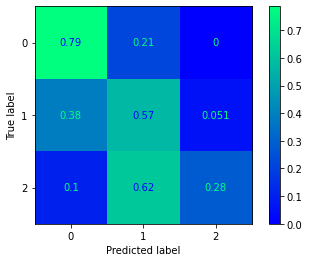

              precision    recall  f1-score   support

         0.0       0.67      0.79      0.72       145
         1.0       0.58      0.57      0.57       136
         2.0       0.61      0.28      0.39        39
		 R2 Score: 0.12685752665603223

SVM - Linear, Train Accuracy = 0.63721657544957, C=0.08768655309731553
Test Accuracy = 0.63125


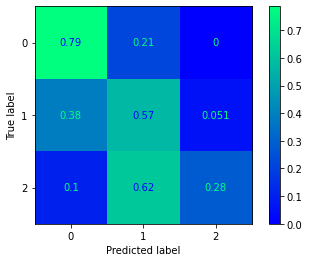

              precision    recall  f1-score   support

         0.0       0.67      0.79      0.72       145
         1.0       0.58      0.57      0.57       136
         2.0       0.61      0.28      0.39        39
		 R2 Score: 0.12685752665603223

SVM - Linear, Train Accuracy = 0.6387802971071149, C=0.09950851564341409
Test Accuracy = 0.63125


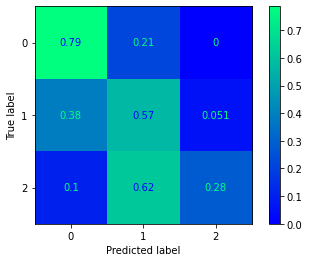

              precision    recall  f1-score   support

         0.0       0.67      0.79      0.72       145
         1.0       0.58      0.57      0.57       136
         2.0       0.61      0.28      0.39        39
		 R2 Score: 0.12685752665603223

SVM - Linear, Train Accuracy = 0.6419077404222049, C=0.11292432346572343
Test Accuracy = 0.63125


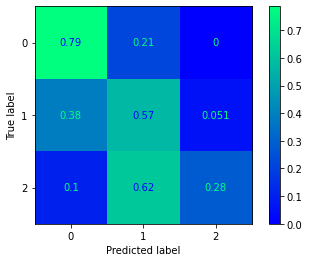

              precision    recall  f1-score   support

         0.0       0.67      0.79      0.72       145
         1.0       0.58      0.57      0.57       136
         2.0       0.61      0.28      0.39        39
		 R2 Score: 0.12685752665603223

SVM - Linear, Train Accuracy = 0.6419077404222049, C=0.12814885990147223
Test Accuracy = 0.61875


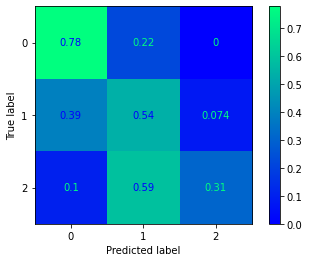

              precision    recall  f1-score   support

         0.0       0.66      0.78      0.72       145
         1.0       0.57      0.54      0.55       136
         2.0       0.55      0.31      0.39        39
		 R2 Score: 0.09999160439929466

SVM - Linear, Train Accuracy = 0.6411258795934324, C=0.14542597901002138
Test Accuracy = 0.625


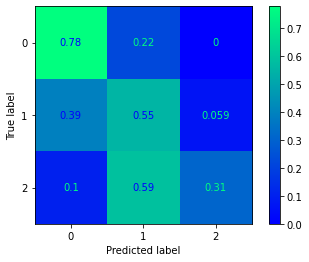

              precision    recall  f1-score   support

         0.0       0.66      0.78      0.72       145
         1.0       0.58      0.55      0.56       136
         2.0       0.60      0.31      0.41        39
		 R2 Score: 0.11342456552766345

SVM - Linear, Train Accuracy = 0.6419077404222049, C=0.1650324114259265
Test Accuracy = 0.628125


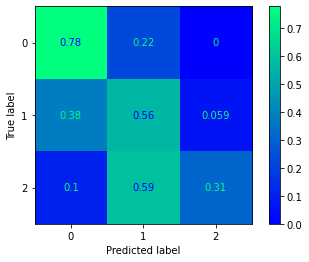

              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72       145
         1.0       0.58      0.56      0.57       136
         2.0       0.60      0.31      0.41        39
		 R2 Score: 0.12014104609184784

SVM - Linear, Train Accuracy = 0.6403440187646599, C=0.1872821968018482
Test Accuracy = 0.625


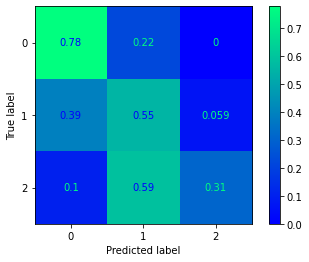

              precision    recall  f1-score   support

         0.0       0.66      0.78      0.72       145
         1.0       0.58      0.55      0.56       136
         2.0       0.60      0.31      0.41        39
		 R2 Score: 0.11342456552766345

SVM - Linear, Train Accuracy = 0.6419077404222049, C=0.2125317138365222
Test Accuracy = 0.625


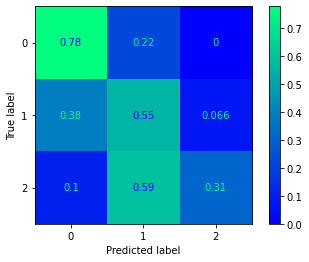

              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72       145
         1.0       0.58      0.55      0.56       136
         2.0       0.57      0.31      0.40        39
		 R2 Score: 0.11342456552766345

SVM - Linear, Train Accuracy = 0.6426896012509773, C=0.2411853884546254
Test Accuracy = 0.625


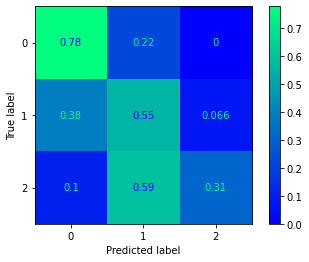

              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72       145
         1.0       0.58      0.55      0.56       136
         2.0       0.57      0.31      0.40        39
		 R2 Score: 0.11342456552766345

SVM - Linear, Train Accuracy = 0.6426896012509773, C=0.2737021715674527
Test Accuracy = 0.621875


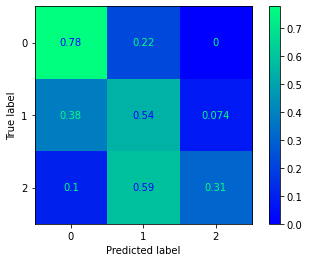

              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72       145
         1.0       0.57      0.54      0.56       136
         2.0       0.55      0.31      0.39        39
		 R2 Score: 0.10670808496347906

SVM - Linear, Train Accuracy = 0.6411258795934324, C=0.3106028901698279
Test Accuracy = 0.621875


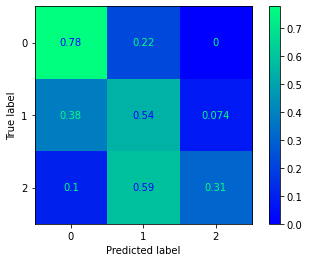

              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72       145
         1.0       0.57      0.54      0.56       136
         2.0       0.55      0.31      0.39        39
		 R2 Score: 0.10670808496347906

SVM - Linear, Train Accuracy = 0.6411258795934324, C=0.352478589517053
Test Accuracy = 0.621875


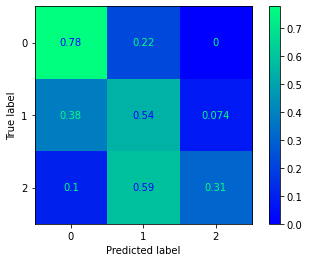

              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72       145
         1.0       0.57      0.54      0.56       136
         2.0       0.55      0.31      0.39        39
		 R2 Score: 0.10670808496347906

SVM - Linear, Train Accuracy = 0.6379984362783424, C=0.4
Test Accuracy = 0.615625


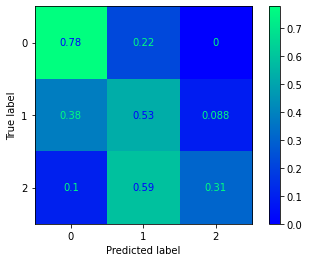

              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72       145
         1.0       0.57      0.53      0.55       136
         2.0       0.50      0.31      0.38        39
		 R2 Score: 0.09327512383511039



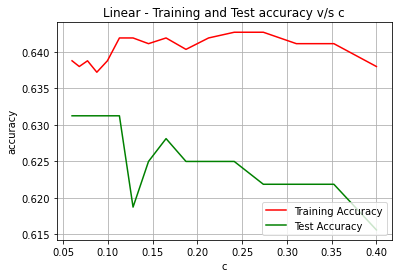

SVM - RBF, Train Accuracy = 0.7146207974980453, C=1.0
Test Accuracy = 0.66875


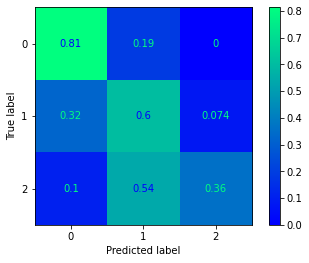

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       145
         1.0       0.63      0.60      0.62       136
         2.0       0.58      0.36      0.44        39
		 R2 Score: 0.20745529342624458

SVM - RBF, Train Accuracy = 0.7232212666145426, C=1.2324856054625426
Test Accuracy = 0.671875


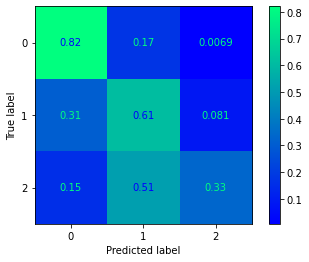

              precision    recall  f1-score   support

         0.0       0.71      0.82      0.76       145
         1.0       0.65      0.61      0.63       136
         2.0       0.52      0.33      0.41        39
		 R2 Score: 0.15372344891276968

SVM - RBF, Train Accuracy = 0.7240031274433151, C=1.5190207676723702
Test Accuracy = 0.675


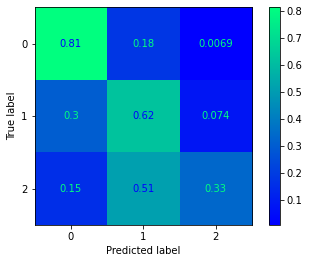

              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76       145
         1.0       0.65      0.62      0.64       136
         2.0       0.54      0.33      0.41        39
		 R2 Score: 0.16043992947695396

SVM - RBF, Train Accuracy = 0.7333854573885848, C=1.8721712305548572
Test Accuracy = 0.68125


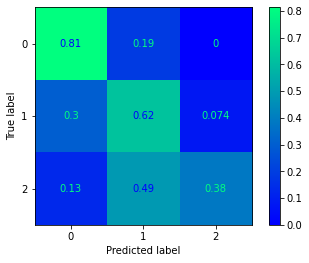

              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76       145
         1.0       0.65      0.62      0.64       136
         2.0       0.60      0.38      0.47        39
		 R2 Score: 0.21417177399042897

SVM - RBF, Train Accuracy = 0.7498045347928068, C=2.3074240926199567
Test Accuracy = 0.68125


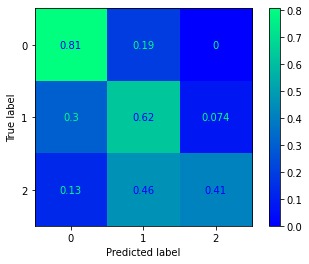

              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76       145
         1.0       0.65      0.62      0.64       136
         2.0       0.62      0.41      0.49        39
		 R2 Score: 0.21417177399042897

SVM - RBF, Train Accuracy = 0.764659890539484, C=2.8438669798515654
Test Accuracy = 0.678125


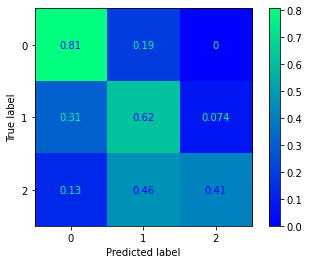

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       145
         1.0       0.65      0.62      0.63       136
         2.0       0.62      0.41      0.49        39
		 R2 Score: 0.20745529342624458

SVM - RBF, Train Accuracy = 0.7685691946833464, C=3.5050251165172885
Test Accuracy = 0.684375


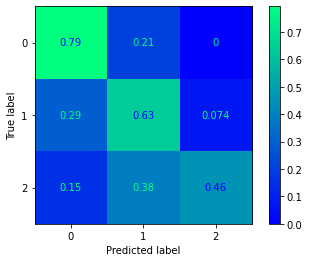

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75       145
         1.0       0.66      0.63      0.64       136
         2.0       0.64      0.46      0.54        39
		 R2 Score: 0.2007388128620602

SVM - RBF, Train Accuracy = 0.7787333854573886, C=4.31989300289223
Test Accuracy = 0.6875


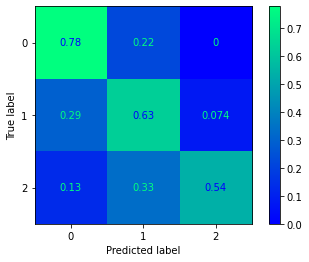

              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75       145
         1.0       0.66      0.63      0.64       136
         2.0       0.68      0.54      0.60        39
		 R2 Score: 0.22760473511879764

SVM - RBF, Train Accuracy = 0.7928068803752932, C=5.32420594320303
Test Accuracy = 0.675


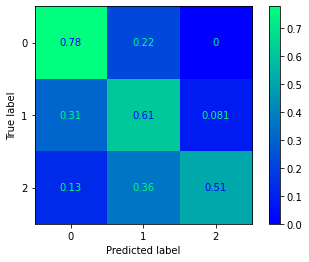

              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74       145
         1.0       0.64      0.61      0.63       136
         2.0       0.65      0.51      0.57        39
		 R2 Score: 0.2007388128620602

SVM - RBF, Train Accuracy = 0.8021892103205629, C=6.562007185515855
Test Accuracy = 0.671875


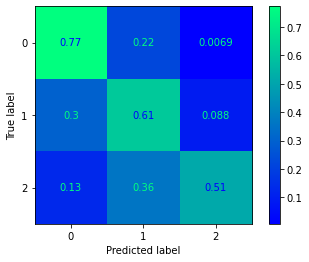

              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74       145
         1.0       0.64      0.61      0.63       136
         2.0       0.61      0.51      0.56        39
		 R2 Score: 0.17387289060532274

SVM - RBF, Train Accuracy = 0.8146989835809226, C=8.087579399090064
Test Accuracy = 0.66875


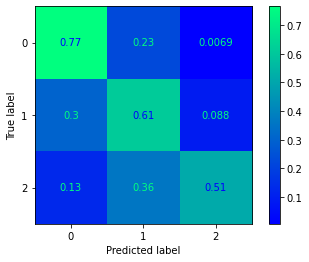

              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74       145
         1.0       0.64      0.61      0.62       136
         2.0       0.61      0.51      0.56        39
		 R2 Score: 0.16715641004113835

SVM - RBF, Train Accuracy = 0.8264268960125097, C=9.967825192413903
Test Accuracy = 0.671875


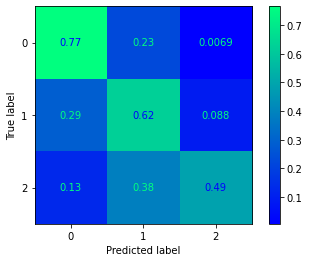

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74       145
         1.0       0.64      0.62      0.63       136
         2.0       0.59      0.49      0.54        39
		 R2 Score: 0.17387289060532274

SVM - RBF, Train Accuracy = 0.8334636434714621, C=12.285201067417033
Test Accuracy = 0.675


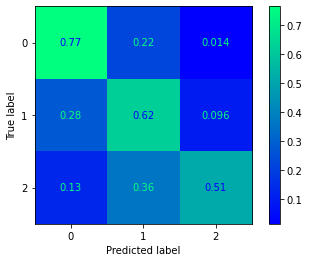

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74       145
         1.0       0.65      0.62      0.64       136
         2.0       0.57      0.51      0.54        39
		 R2 Score: 0.16043992947695396

SVM - RBF, Train Accuracy = 0.8436278342455042, C=15.141333475804554
Test Accuracy = 0.68125


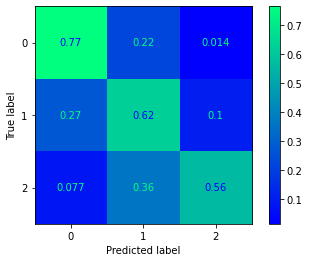

              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75       145
         1.0       0.65      0.62      0.64       136
         2.0       0.58      0.56      0.57        39
		 R2 Score: 0.21417177399042897

SVM - RBF, Train Accuracy = 0.8553557466770915, C=18.66147555643725
Test Accuracy = 0.678125


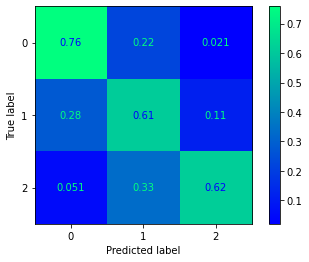

              precision    recall  f1-score   support

         0.0       0.73      0.76      0.75       145
         1.0       0.65      0.61      0.63       136
         2.0       0.57      0.62      0.59        39
		 R2 Score: 0.20745529342624458

SVM - RBF, Train Accuracy = 0.8616106333072713, C=23.0
Test Accuracy = 0.684375


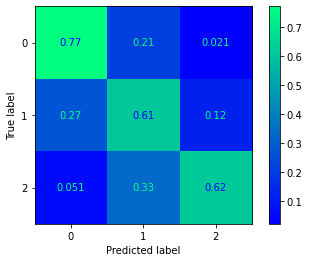

              precision    recall  f1-score   support

         0.0       0.74      0.77      0.76       145
         1.0       0.66      0.61      0.63       136
         2.0       0.56      0.62      0.59        39
		 R2 Score: 0.22088825455461336



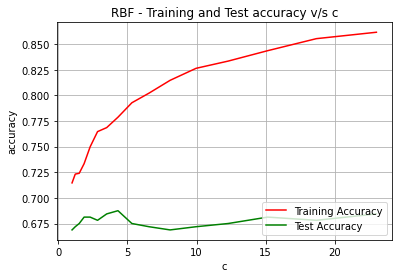

SVM - Poly, Train Accuracy = 0.584831899921814, C=0.1
Test Accuracy = 0.56875


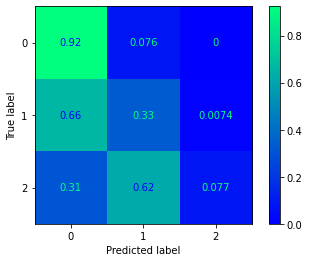

              precision    recall  f1-score   support

         0.0       0.57      0.92      0.70       145
         1.0       0.56      0.33      0.42       136
         2.0       0.75      0.08      0.14        39
		 R2 Score: -0.16866761816807996

SVM - Poly, Train Accuracy = 0.6004691164972635, C=0.151332195791627
Test Accuracy = 0.603125


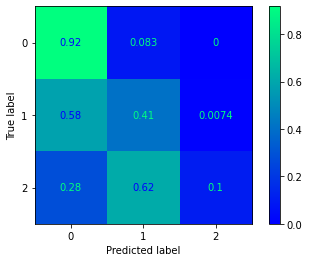

              precision    recall  f1-score   support

         0.0       0.60      0.92      0.72       145
         1.0       0.61      0.41      0.49       136
         2.0       0.80      0.10      0.18        39
		 R2 Score: -0.07463689026949893

SVM - Poly, Train Accuracy = 0.6215793588741204, C=0.22901433483115327
Test Accuracy = 0.615625


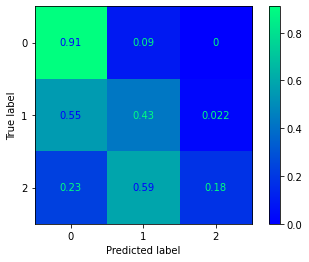

              precision    recall  f1-score   support

         0.0       0.61      0.91      0.73       145
         1.0       0.62      0.43      0.50       136
         2.0       0.70      0.18      0.29        39
		 R2 Score: -0.007472084627655251

SVM - Poly, Train Accuracy = 0.6426896012509773, C=0.3465724215775732
Test Accuracy = 0.621875


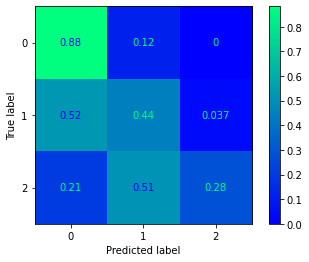

              precision    recall  f1-score   support

         0.0       0.62      0.88      0.73       145
         1.0       0.62      0.44      0.52       136
         2.0       0.69      0.28      0.40        39
		 R2 Score: 0.0261103181932667

SVM - Poly, Train Accuracy = 0.6598905394839718, C=0.524475655581556
Test Accuracy = 0.653125


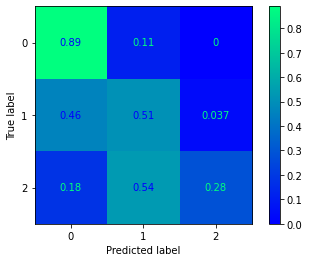

              precision    recall  f1-score   support

         0.0       0.65      0.89      0.75       145
         1.0       0.65      0.51      0.57       136
         2.0       0.69      0.28      0.40        39
		 R2 Score: 0.11342456552766345

SVM - Poly, Train Accuracy = 0.6810007818608288, C=0.7937005259840996
Test Accuracy = 0.640625


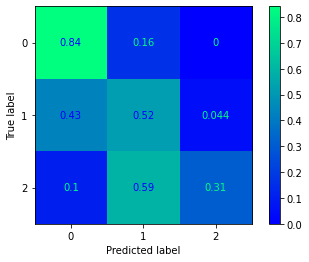

              precision    recall  f1-score   support

         0.0       0.66      0.84      0.74       145
         1.0       0.61      0.52      0.56       136
         2.0       0.67      0.31      0.42        39
		 R2 Score: 0.1470069683485853

SVM - Poly, Train Accuracy = 0.709147771696638, C=1.201124433981431
Test Accuracy = 0.659375


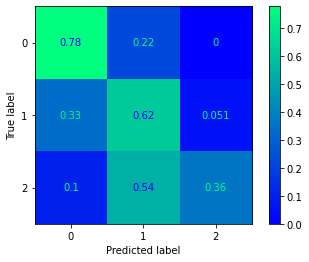

              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74       145
         1.0       0.61      0.62      0.62       136
         2.0       0.67      0.36      0.47        39
		 R2 Score: 0.18730585173369152

SVM - Poly, Train Accuracy = 0.7224394057857702, C=1.8176879801338506
Test Accuracy = 0.665625


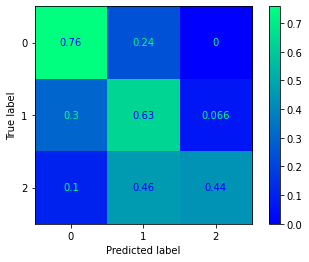

              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73       145
         1.0       0.62      0.63      0.63       136
         2.0       0.65      0.44      0.52        39
		 R2 Score: 0.2007388128620602

SVM - Poly, Train Accuracy = 0.72869429241595, C=2.7507471329770294
Test Accuracy = 0.671875


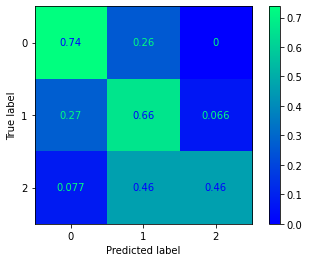

              precision    recall  f1-score   support

         0.0       0.73      0.74      0.73       145
         1.0       0.62      0.66      0.64       136
         2.0       0.67      0.46      0.55        39
		 R2 Score: 0.23432121568298203

SVM - Poly, Train Accuracy = 0.7498045347928068, C=4.162766037009366
Test Accuracy = 0.684375


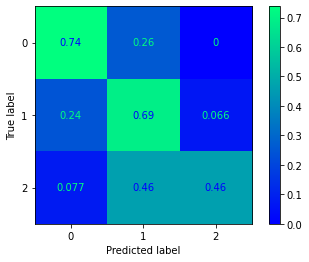

              precision    recall  f1-score   support

         0.0       0.75      0.74      0.74       145
         1.0       0.63      0.69      0.66       136
         2.0       0.67      0.46      0.55        39
		 R2 Score: 0.2611871379397195

SVM - Poly, Train Accuracy = 0.7638780297107115, C=6.2996052494743635
Test Accuracy = 0.68125


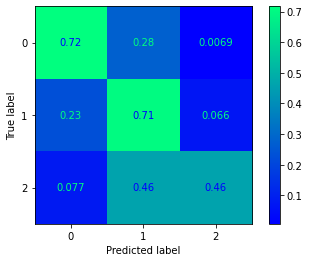

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73       145
         1.0       0.62      0.71      0.66       136
         2.0       0.64      0.46      0.54        39
		 R2 Score: 0.23432121568298203

SVM - Poly, Train Accuracy = 0.7732603596559813, C=9.533330950234157
Test Accuracy = 0.678125


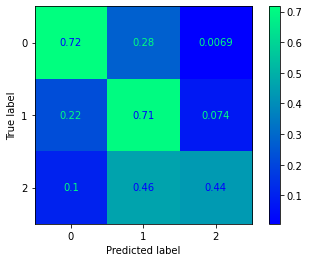

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73       145
         1.0       0.62      0.71      0.66       136
         2.0       0.61      0.44      0.51        39
		 R2 Score: 0.20745529342624458

SVM - Poly, Train Accuracy = 0.7896794370602033, C=14.426999059072134
Test Accuracy = 0.690625


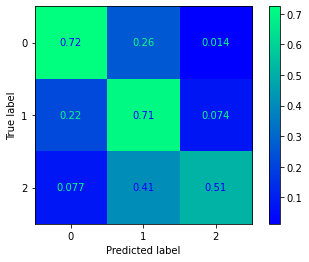

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74       145
         1.0       0.64      0.71      0.67       136
         2.0       0.62      0.51      0.56        39
		 R2 Score: 0.23432121568298203

SVM - Poly, Train Accuracy = 0.7943706020328382, C=21.832694462931222
Test Accuracy = 0.671875


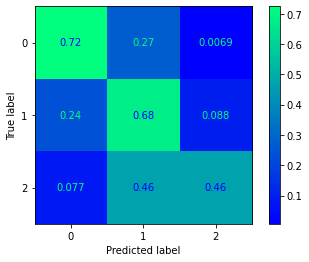

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74       145
         1.0       0.62      0.68      0.65       136
         2.0       0.58      0.46      0.51        39
		 R2 Score: 0.21417177399042897

SVM - Poly, Train Accuracy = 0.8053166536356529, C=33.039895931230774
Test Accuracy = 0.65625


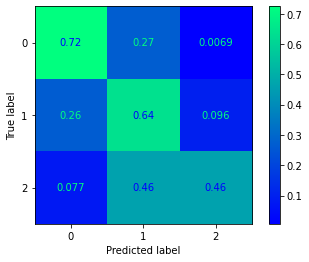

              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73       145
         1.0       0.60      0.64      0.62       136
         2.0       0.56      0.46      0.51        39
		 R2 Score: 0.18058937116950713

SVM - Poly, Train Accuracy = 0.8170445660672401, C=50.0
Test Accuracy = 0.65


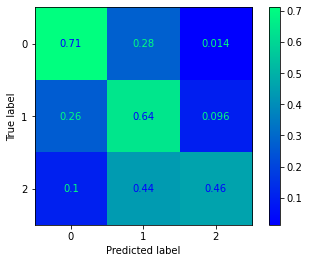

              precision    recall  f1-score   support

         0.0       0.72      0.71      0.72       145
         1.0       0.60      0.64      0.62       136
         2.0       0.55      0.46      0.50        39
		 R2 Score: 0.12685752665603223



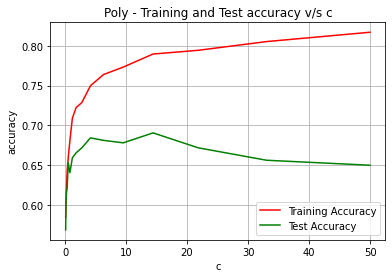

In [878]:
num_of_different_c = 16
c_svm_linear = np.geomspace(0.06, 0.4, num=num_of_different_c)
c_svm_rbf = np.geomspace(1, 23, num=num_of_different_c)
c_svm_poly = np.geomspace(0.1, 50, num=num_of_different_c)

train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)

# Train White Wines Data

In [879]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([744, 638, 217]), array([-0.5,  0.5,  1.5,  2.5]))
y min: 0.0, y max: 2.0
The shape of the wines dataset: (1599, 12)
y[:10]:
[2. 0. 0. 0. 0. 1. 2. 0. 0. 2.]
X[:10, :]:
[[ 6.1      0.4      0.16     1.8      0.069   11.      25.       0.9955
   3.42     0.74    10.1    ]
 [10.2      0.24     0.49     2.4      0.075   10.      28.       0.9978
   3.14     0.61    10.4    ]
 [ 9.3      0.715    0.24     2.1      0.07     5.      20.       0.9966
   3.12     0.59     9.9    ]
 [ 6.4      0.64     0.21     1.8      0.081   14.      31.       0.99689
   3.59     0.66     9.8    ]
 [ 7.6      0.43     0.29     2.1      0.075   19.      66.       0.99718
   3.4      0.64     9.5    ]
 [10.1      0.65     0.37     5.1      0.11    11.      65.       1.0026
   3.32     0.64    10.4    ]
 [10.7      0.35     0.53     2.6      0.07     5.      16.       0.9972
   3.15     0

SVM - Linear, Train Accuracy = 0.6098514464425332, C=0.06
Test Accuracy = 0.625


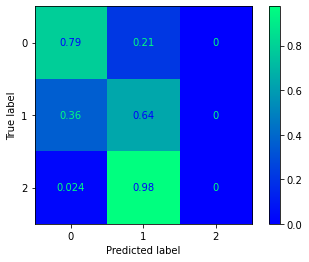

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       151
         1.0       0.53      0.64      0.58       127
         2.0       0.00      0.00      0.00        42
		 R2 Score: 0.2108903546582731

SVM - Linear, Train Accuracy = 0.6098514464425332, C=0.0680892420526407
Test Accuracy = 0.625


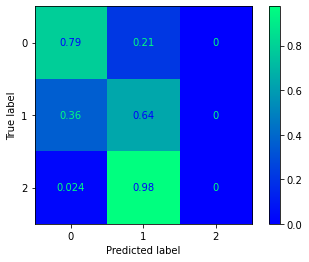

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       151
         1.0       0.53      0.64      0.58       127
         2.0       0.00      0.00      0.00        42
		 R2 Score: 0.2108903546582731

SVM - Linear, Train Accuracy = 0.6098514464425332, C=0.07726908138838487
Test Accuracy = 0.625


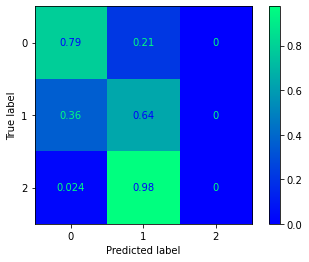

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       151
         1.0       0.53      0.64      0.58       127
         2.0       0.00      0.00      0.00        42
		 R2 Score: 0.2108903546582731

SVM - Linear, Train Accuracy = 0.6090695856137608, C=0.08768655309731553
Test Accuracy = 0.625


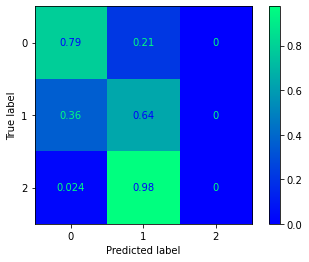

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       151
         1.0       0.53      0.64      0.58       127
         2.0       0.00      0.00      0.00        42
		 R2 Score: 0.2108903546582731

SVM - Linear, Train Accuracy = 0.6090695856137608, C=0.09950851564341409
Test Accuracy = 0.625


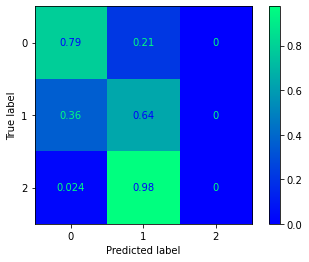

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       151
         1.0       0.53      0.64      0.58       127
         2.0       0.00      0.00      0.00        42
		 R2 Score: 0.2108903546582731

SVM - Linear, Train Accuracy = 0.6082877247849883, C=0.11292432346572343
Test Accuracy = 0.625


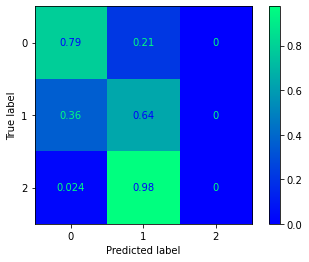

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       151
         1.0       0.53      0.64      0.58       127
         2.0       0.00      0.00      0.00        42
		 R2 Score: 0.2108903546582731

SVM - Linear, Train Accuracy = 0.6090695856137608, C=0.12814885990147223
Test Accuracy = 0.625


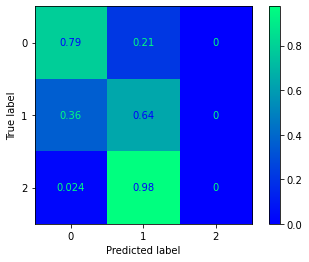

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       151
         1.0       0.53      0.64      0.58       127
         2.0       0.00      0.00      0.00        42
		 R2 Score: 0.2108903546582731

SVM - Linear, Train Accuracy = 0.6059421422986708, C=0.14542597901002138
Test Accuracy = 0.625


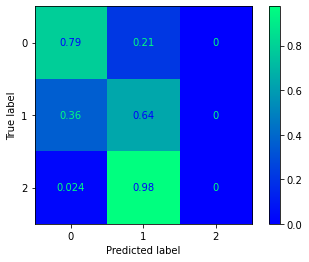

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       151
         1.0       0.53      0.64      0.58       127
         2.0       0.00      0.00      0.00        42
		 R2 Score: 0.2108903546582731

SVM - Linear, Train Accuracy = 0.6075058639562158, C=0.1650324114259265
Test Accuracy = 0.625


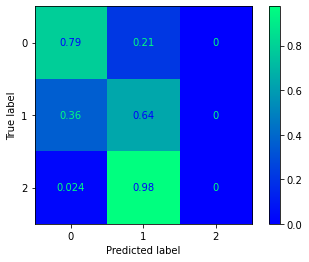

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       151
         1.0       0.53      0.64      0.58       127
         2.0       0.00      0.00      0.00        42
		 R2 Score: 0.2108903546582731

SVM - Linear, Train Accuracy = 0.6137607505863957, C=0.1872821968018482
Test Accuracy = 0.634375


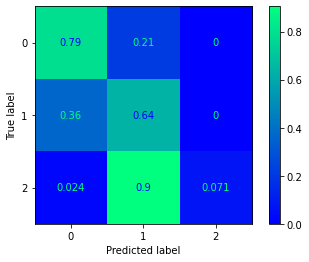

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       151
         1.0       0.54      0.64      0.58       127
         2.0       1.00      0.07      0.13        42
		 R2 Score: 0.230136931373925

SVM - Linear, Train Accuracy = 0.6168881939014855, C=0.2125317138365222
Test Accuracy = 0.646875


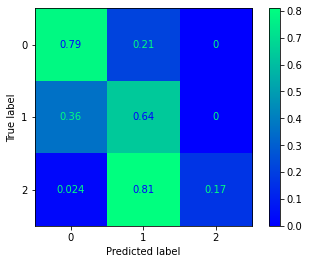

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       151
         1.0       0.55      0.64      0.59       127
         2.0       1.00      0.17      0.29        42
		 R2 Score: 0.25579903366146084

SVM - Linear, Train Accuracy = 0.6223612197028929, C=0.2411853884546254
Test Accuracy = 0.640625


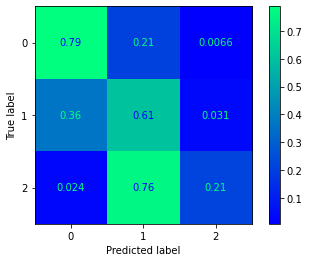

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       151
         1.0       0.55      0.61      0.58       127
         2.0       0.64      0.21      0.32        42
		 R2 Score: 0.22372140580204103

SVM - Linear, Train Accuracy = 0.6223612197028929, C=0.2737021715674527
Test Accuracy = 0.6375


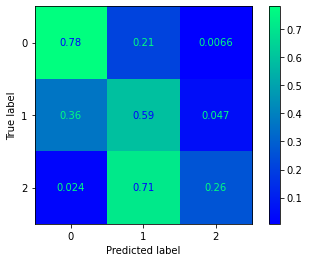

              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75       151
         1.0       0.55      0.59      0.57       127
         2.0       0.61      0.26      0.37        42
		 R2 Score: 0.21730588023015707

SVM - Linear, Train Accuracy = 0.6223612197028929, C=0.3106028901698279
Test Accuracy = 0.6375


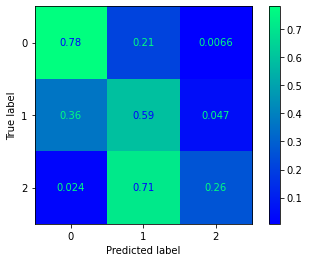

              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75       151
         1.0       0.55      0.59      0.57       127
         2.0       0.61      0.26      0.37        42
		 R2 Score: 0.21730588023015707

SVM - Linear, Train Accuracy = 0.6215793588741204, C=0.352478589517053
Test Accuracy = 0.6375


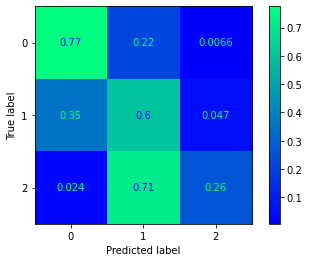

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.75       151
         1.0       0.55      0.60      0.57       127
         2.0       0.61      0.26      0.37        42
		 R2 Score: 0.21730588023015707

SVM - Linear, Train Accuracy = 0.6215793588741204, C=0.4
Test Accuracy = 0.640625


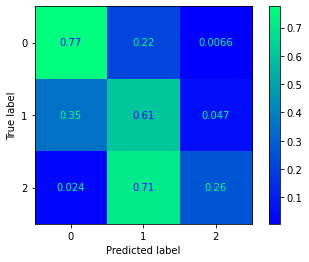

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.75       151
         1.0       0.55      0.61      0.58       127
         2.0       0.61      0.26      0.37        42
		 R2 Score: 0.22372140580204103



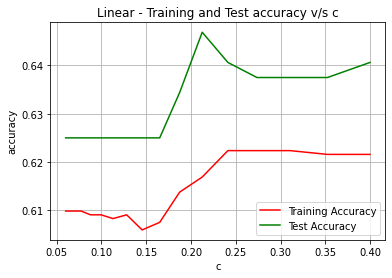

SVM - RBF, Train Accuracy = 0.7099296325254105, C=1.0
Test Accuracy = 0.653125


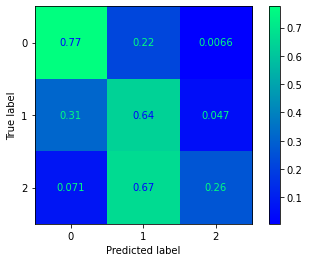

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       151
         1.0       0.57      0.64      0.60       127
         2.0       0.61      0.26      0.37        42
		 R2 Score: 0.2108903546582731

SVM - RBF, Train Accuracy = 0.7114933541829555, C=1.2324856054625426
Test Accuracy = 0.65625


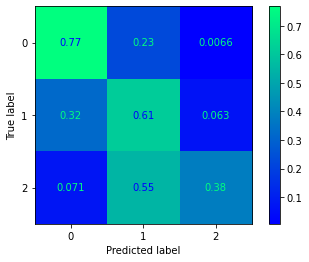

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.75       151
         1.0       0.58      0.61      0.60       127
         2.0       0.64      0.38      0.48        42
		 R2 Score: 0.21730588023015707

SVM - RBF, Train Accuracy = 0.7240031274433151, C=1.5190207676723702
Test Accuracy = 0.65625


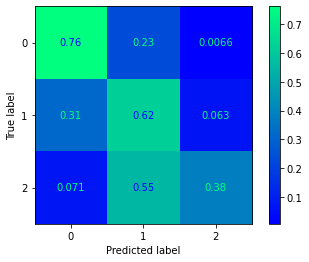

              precision    recall  f1-score   support

         0.0       0.73      0.76      0.74       151
         1.0       0.58      0.62      0.60       127
         2.0       0.64      0.38      0.48        42
		 R2 Score: 0.21730588023015707

SVM - RBF, Train Accuracy = 0.72556684910086, C=1.8721712305548572
Test Accuracy = 0.65625


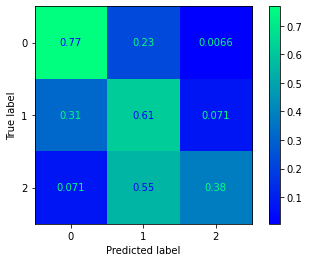

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       151
         1.0       0.58      0.61      0.60       127
         2.0       0.62      0.38      0.47        42
		 R2 Score: 0.21730588023015707

SVM - RBF, Train Accuracy = 0.7372947615324472, C=2.3074240926199567
Test Accuracy = 0.653125


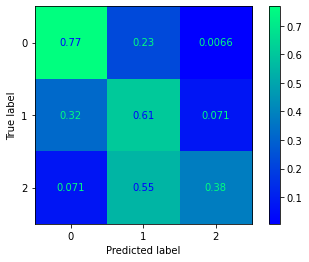

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.75       151
         1.0       0.57      0.61      0.59       127
         2.0       0.62      0.38      0.47        42
		 R2 Score: 0.2108903546582731

SVM - RBF, Train Accuracy = 0.7419859265050821, C=2.8438669798515654
Test Accuracy = 0.646875


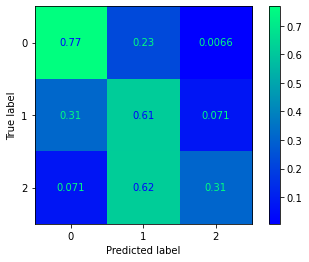

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       151
         1.0       0.57      0.61      0.59       127
         2.0       0.57      0.31      0.40        42
		 R2 Score: 0.19805930351450518

SVM - RBF, Train Accuracy = 0.7529319781078968, C=3.5050251165172885
Test Accuracy = 0.659375


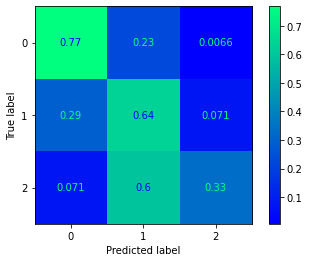

              precision    recall  f1-score   support

         0.0       0.74      0.77      0.76       151
         1.0       0.58      0.64      0.61       127
         2.0       0.58      0.33      0.42        42
		 R2 Score: 0.22372140580204103

SVM - RBF, Train Accuracy = 0.7623143080531666, C=4.31989300289223
Test Accuracy = 0.671875


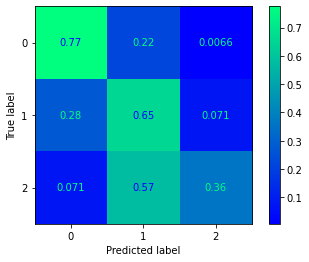

              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76       151
         1.0       0.59      0.65      0.62       127
         2.0       0.60      0.36      0.45        42
		 R2 Score: 0.24938350808957688

SVM - RBF, Train Accuracy = 0.7701329163408913, C=5.32420594320303
Test Accuracy = 0.671875


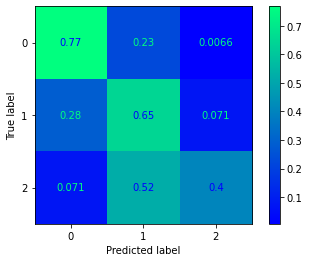

              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76       151
         1.0       0.59      0.65      0.62       127
         2.0       0.63      0.40      0.49        42
		 R2 Score: 0.24938350808957688

SVM - RBF, Train Accuracy = 0.7771696637998436, C=6.562007185515855
Test Accuracy = 0.66875


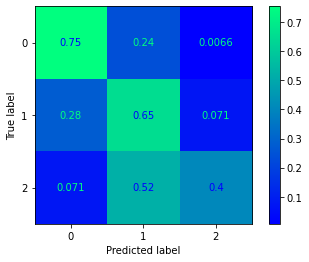

              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75       151
         1.0       0.59      0.65      0.62       127
         2.0       0.63      0.40      0.49        42
		 R2 Score: 0.24296798251769292

SVM - RBF, Train Accuracy = 0.7896794370602033, C=8.087579399090064
Test Accuracy = 0.66875


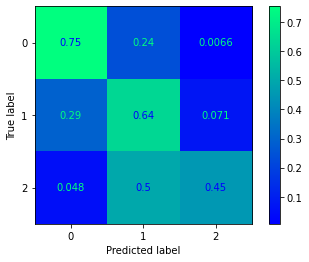

              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75       151
         1.0       0.59      0.64      0.61       127
         2.0       0.66      0.45      0.54        42
		 R2 Score: 0.2622145592333448

SVM - RBF, Train Accuracy = 0.8076622361219703, C=9.967825192413903
Test Accuracy = 0.675


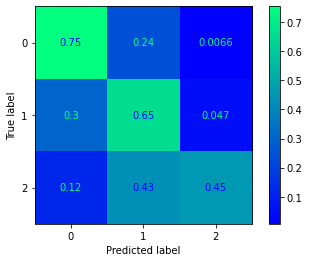

              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74       151
         1.0       0.61      0.65      0.63       127
         2.0       0.73      0.45      0.56        42
		 R2 Score: 0.21730588023015707

SVM - RBF, Train Accuracy = 0.8201720093823299, C=12.285201067417033
Test Accuracy = 0.6625


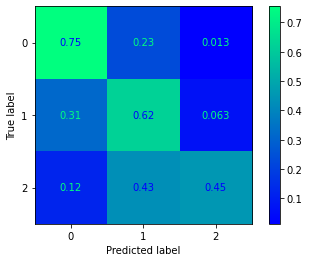

              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74       151
         1.0       0.60      0.62      0.61       127
         2.0       0.66      0.45      0.54        42
		 R2 Score: 0.17239720122696933

SVM - RBF, Train Accuracy = 0.8240813135261923, C=15.141333475804554
Test Accuracy = 0.65625


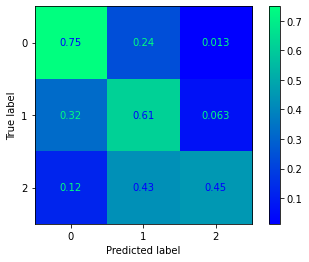

              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       151
         1.0       0.59      0.61      0.60       127
         2.0       0.66      0.45      0.54        42
		 R2 Score: 0.1595661500832014

SVM - RBF, Train Accuracy = 0.8373729476153244, C=18.66147555643725
Test Accuracy = 0.646875


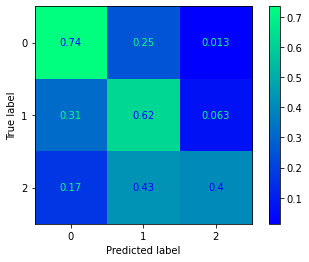

              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72       151
         1.0       0.59      0.62      0.60       127
         2.0       0.63      0.40      0.49        42
		 R2 Score: 0.10182641993624586

SVM - RBF, Train Accuracy = 0.8428459734167318, C=23.0
Test Accuracy = 0.659375


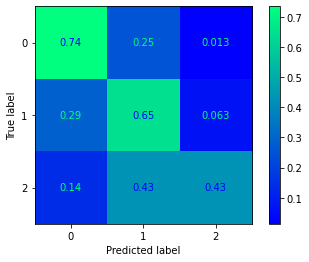

              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73       151
         1.0       0.59      0.65      0.62       127
         2.0       0.64      0.43      0.51        42
		 R2 Score: 0.14673509893943348



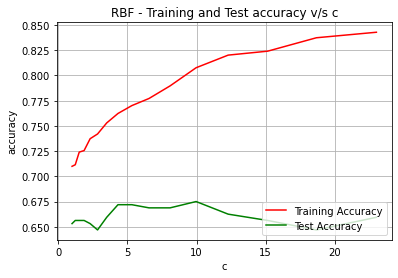

SVM - Poly, Train Accuracy = 0.5910867865519938, C=0.1
Test Accuracy = 0.596875


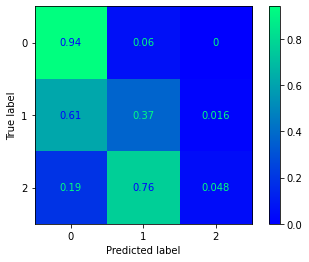

              precision    recall  f1-score   support

         0.0       0.62      0.94      0.75       151
         1.0       0.53      0.37      0.44       127
         2.0       0.50      0.05      0.09        42
		 R2 Score: 0.018424587501754353

SVM - Poly, Train Accuracy = 0.6129788897576232, C=0.151332195791627
Test Accuracy = 0.603125


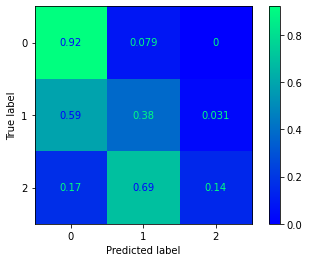

              precision    recall  f1-score   support

         0.0       0.63      0.92      0.75       151
         1.0       0.54      0.38      0.44       127
         2.0       0.60      0.14      0.23        42
		 R2 Score: 0.05050221536117416

SVM - Poly, Train Accuracy = 0.63408913213448, C=0.22901433483115327
Test Accuracy = 0.6125


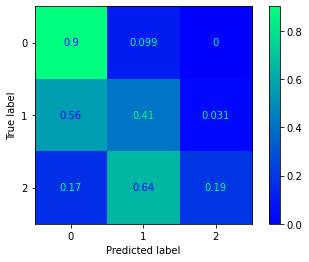

              precision    recall  f1-score   support

         0.0       0.64      0.90      0.75       151
         1.0       0.55      0.41      0.47       127
         2.0       0.67      0.19      0.30        42
		 R2 Score: 0.06974879207682605

SVM - Poly, Train Accuracy = 0.6512900703674745, C=0.3465724215775732
Test Accuracy = 0.60625


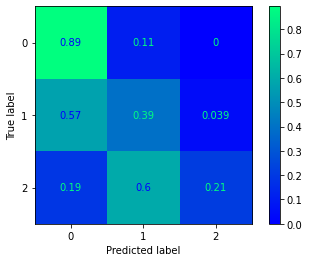

              precision    recall  f1-score   support

         0.0       0.63      0.89      0.74       151
         1.0       0.55      0.39      0.46       127
         2.0       0.64      0.21      0.32        42
		 R2 Score: 0.03767116421740624

SVM - Poly, Train Accuracy = 0.6724003127443315, C=0.524475655581556
Test Accuracy = 0.621875


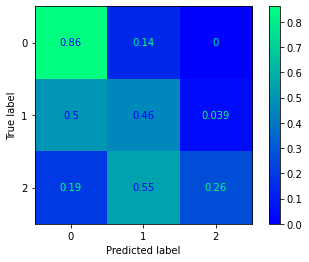

              precision    recall  f1-score   support

         0.0       0.64      0.86      0.74       151
         1.0       0.57      0.46      0.51       127
         2.0       0.69      0.26      0.38        42
		 R2 Score: 0.06974879207682605

SVM - Poly, Train Accuracy = 0.6966379984362784, C=0.7937005259840996
Test Accuracy = 0.61875


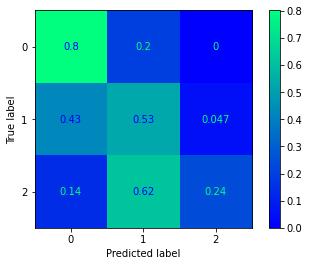

              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73       151
         1.0       0.54      0.53      0.54       127
         2.0       0.62      0.24      0.34        42
		 R2 Score: 0.10182641993624586

SVM - Poly, Train Accuracy = 0.706020328381548, C=1.201124433981431
Test Accuracy = 0.625


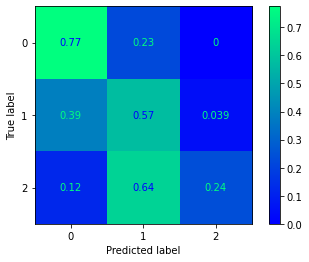

              precision    recall  f1-score   support

         0.0       0.68      0.77      0.73       151
         1.0       0.54      0.57      0.56       127
         2.0       0.67      0.24      0.35        42
		 R2 Score: 0.13390404779566556

SVM - Poly, Train Accuracy = 0.7326035965598123, C=1.8176879801338506
Test Accuracy = 0.628125


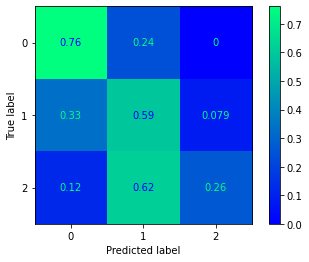

              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73       151
         1.0       0.55      0.59      0.57       127
         2.0       0.52      0.26      0.35        42
		 R2 Score: 0.14031957336754952

SVM - Poly, Train Accuracy = 0.7380766223612197, C=2.7507471329770294
Test Accuracy = 0.653125


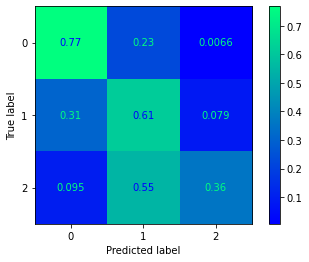

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       151
         1.0       0.58      0.61      0.60       127
         2.0       0.58      0.36      0.44        42
		 R2 Score: 0.19164377794262122

SVM - Poly, Train Accuracy = 0.7505863956215794, C=4.162766037009366
Test Accuracy = 0.665625


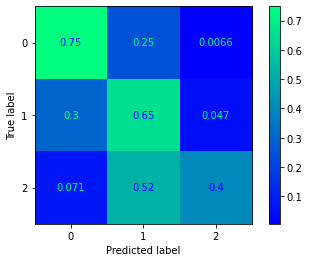

              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74       151
         1.0       0.58      0.65      0.62       127
         2.0       0.71      0.40      0.52        42
		 R2 Score: 0.23655245694580895

SVM - Poly, Train Accuracy = 0.7544956997654417, C=6.2996052494743635
Test Accuracy = 0.675


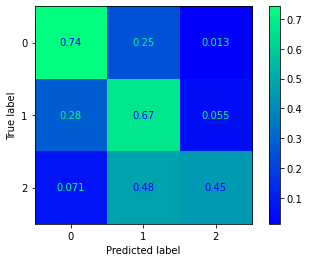

              precision    recall  f1-score   support

         0.0       0.75      0.74      0.74       151
         1.0       0.60      0.67      0.63       127
         2.0       0.68      0.45      0.54        42
		 R2 Score: 0.23655245694580895

SVM - Poly, Train Accuracy = 0.7615324472243941, C=9.533330950234157
Test Accuracy = 0.659375


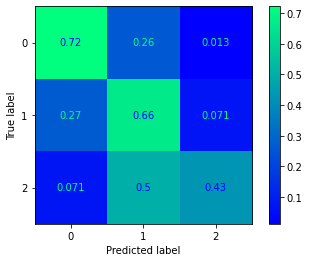

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73       151
         1.0       0.58      0.66      0.62       127
         2.0       0.62      0.43      0.51        42
		 R2 Score: 0.20447482908638914

SVM - Poly, Train Accuracy = 0.7584050039093041, C=14.426999059072134
Test Accuracy = 0.653125


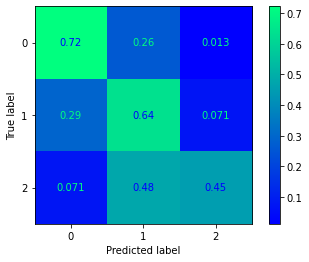

              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73       151
         1.0       0.57      0.64      0.60       127
         2.0       0.63      0.45      0.53        42
		 R2 Score: 0.19164377794262122

SVM - Poly, Train Accuracy = 0.7724784988272088, C=21.832694462931222
Test Accuracy = 0.65


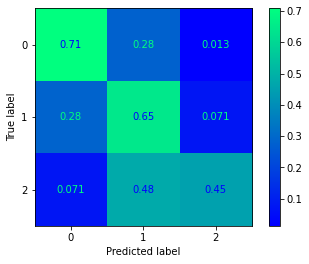

              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72       151
         1.0       0.57      0.65      0.61       127
         2.0       0.63      0.45      0.53        42
		 R2 Score: 0.18522825237073726

SVM - Poly, Train Accuracy = 0.7857701329163409, C=33.039895931230774
Test Accuracy = 0.653125


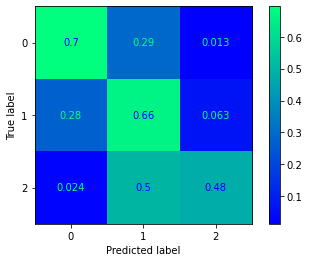

              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72       151
         1.0       0.56      0.66      0.61       127
         2.0       0.67      0.48      0.56        42
		 R2 Score: 0.230136931373925

SVM - Poly, Train Accuracy = 0.800625488663018, C=50.0
Test Accuracy = 0.65


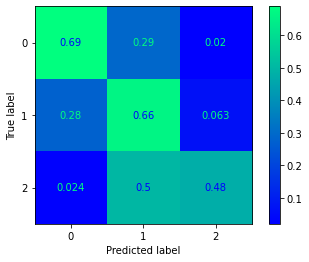

              precision    recall  f1-score   support

         0.0       0.74      0.69      0.71       151
         1.0       0.56      0.66      0.61       127
         2.0       0.65      0.48      0.55        42
		 R2 Score: 0.20447482908638914



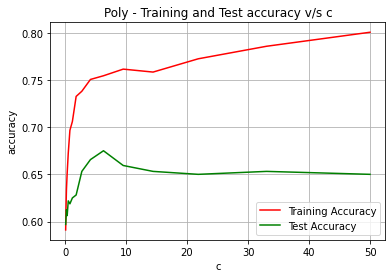

In [880]:
train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)

# Train All Wines Data

In [881]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([744, 638, 217]), array([-0.5,  0.5,  1.5,  2.5]))
y min: 0.0, y max: 2.0
The shape of the wines dataset: (1599, 12)
y[:10]:
[2. 0. 0. 0. 0. 1. 2. 0. 0. 2.]
X[:10, :]:
[[ 6.1      0.4      0.16     1.8      0.069   11.      25.       0.9955
   3.42     0.74    10.1    ]
 [10.2      0.24     0.49     2.4      0.075   10.      28.       0.9978
   3.14     0.61    10.4    ]
 [ 9.3      0.715    0.24     2.1      0.07     5.      20.       0.9966
   3.12     0.59     9.9    ]
 [ 6.4      0.64     0.21     1.8      0.081   14.      31.       0.99689
   3.59     0.66     9.8    ]
 [ 7.6      0.43     0.29     2.1      0.075   19.      66.       0.99718
   3.4      0.64     9.5    ]
 [10.1      0.65     0.37     5.1      0.11    11.      65.       1.0026
   3.32     0.64    10.4    ]
 [10.7      0.35     0.53     2.6      0.07     5.      16.       0.9972
   3.15     0

SVM - Linear, Train Accuracy = 0.6168881939014855, C=0.06
Test Accuracy = 0.6125


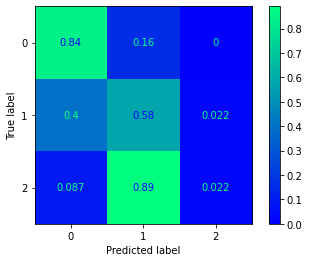

              precision    recall  f1-score   support

         0.0       0.67      0.84      0.74       138
         1.0       0.56      0.58      0.57       136
         2.0       0.25      0.02      0.04        46
		 R2 Score: 0.13678197397651548

SVM - Linear, Train Accuracy = 0.6223612197028929, C=0.0680892420526407
Test Accuracy = 0.615625


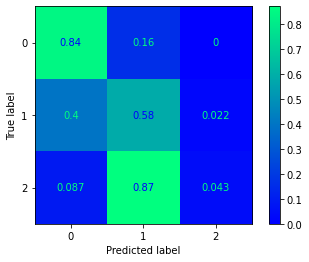

              precision    recall  f1-score   support

         0.0       0.67      0.84      0.74       138
         1.0       0.56      0.58      0.57       136
         2.0       0.40      0.04      0.08        46
		 R2 Score: 0.14312916534433517

SVM - Linear, Train Accuracy = 0.6286161063330727, C=0.07726908138838487
Test Accuracy = 0.6125


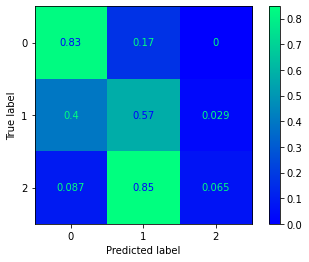

              precision    recall  f1-score   support

         0.0       0.66      0.83      0.74       138
         1.0       0.56      0.57      0.57       136
         2.0       0.43      0.07      0.11        46
		 R2 Score: 0.13678197397651548

SVM - Linear, Train Accuracy = 0.6293979671618452, C=0.08768655309731553
Test Accuracy = 0.621875


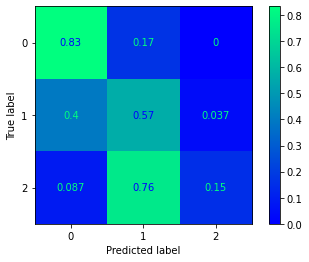

              precision    recall  f1-score   support

         0.0       0.66      0.83      0.74       138
         1.0       0.57      0.57      0.57       136
         2.0       0.58      0.15      0.24        46
		 R2 Score: 0.15582354807997467

SVM - Linear, Train Accuracy = 0.6309616888193902, C=0.09950851564341409
Test Accuracy = 0.621875


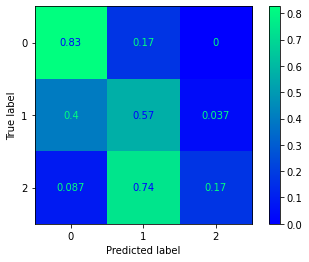

              precision    recall  f1-score   support

         0.0       0.66      0.83      0.74       138
         1.0       0.57      0.57      0.57       136
         2.0       0.62      0.17      0.27        46
		 R2 Score: 0.15582354807997467

SVM - Linear, Train Accuracy = 0.6309616888193902, C=0.11292432346572343
Test Accuracy = 0.621875


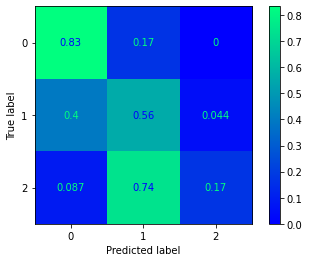

              precision    recall  f1-score   support

         0.0       0.66      0.83      0.74       138
         1.0       0.57      0.56      0.57       136
         2.0       0.57      0.17      0.27        46
		 R2 Score: 0.15582354807997467

SVM - Linear, Train Accuracy = 0.6309616888193902, C=0.12814885990147223
Test Accuracy = 0.61875


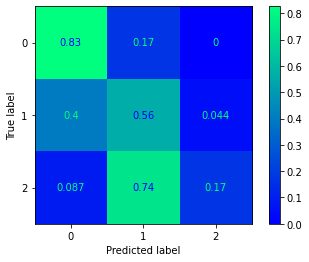

              precision    recall  f1-score   support

         0.0       0.66      0.83      0.74       138
         1.0       0.57      0.56      0.56       136
         2.0       0.57      0.17      0.27        46
		 R2 Score: 0.14947635671215498

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.14542597901002138
Test Accuracy = 0.625


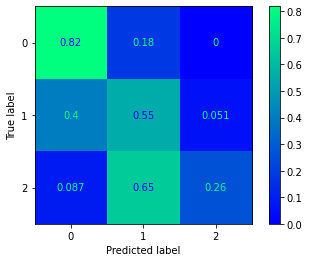

              precision    recall  f1-score   support

         0.0       0.66      0.82      0.73       138
         1.0       0.58      0.55      0.56       136
         2.0       0.63      0.26      0.37        46
		 R2 Score: 0.16217073944779437

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.1650324114259265
Test Accuracy = 0.628125


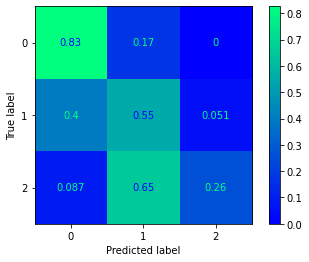

              precision    recall  f1-score   support

         0.0       0.66      0.83      0.74       138
         1.0       0.58      0.55      0.57       136
         2.0       0.63      0.26      0.37        46
		 R2 Score: 0.16851793081561417

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.1872821968018482
Test Accuracy = 0.63125


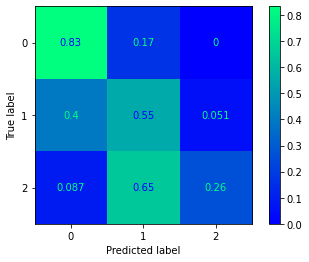

              precision    recall  f1-score   support

         0.0       0.66      0.83      0.74       138
         1.0       0.59      0.55      0.57       136
         2.0       0.63      0.26      0.37        46
		 R2 Score: 0.17486512218343386

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.2125317138365222
Test Accuracy = 0.63125


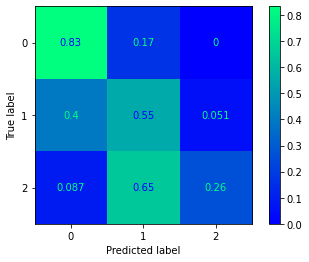

              precision    recall  f1-score   support

         0.0       0.66      0.83      0.74       138
         1.0       0.59      0.55      0.57       136
         2.0       0.63      0.26      0.37        46
		 R2 Score: 0.17486512218343386

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.2411853884546254
Test Accuracy = 0.63125


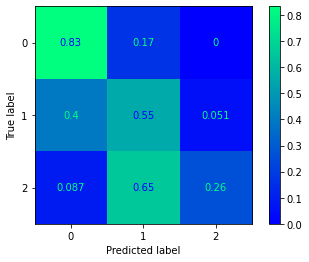

              precision    recall  f1-score   support

         0.0       0.66      0.83      0.74       138
         1.0       0.59      0.55      0.57       136
         2.0       0.63      0.26      0.37        46
		 R2 Score: 0.17486512218343386

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.2737021715674527
Test Accuracy = 0.634375


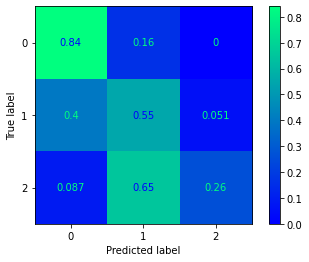

              precision    recall  f1-score   support

         0.0       0.67      0.84      0.74       138
         1.0       0.59      0.55      0.57       136
         2.0       0.63      0.26      0.37        46
		 R2 Score: 0.18121231355125367

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.3106028901698279
Test Accuracy = 0.634375


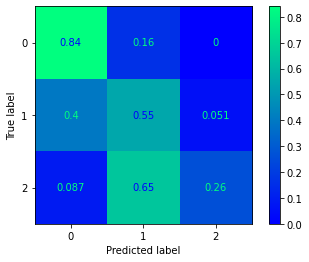

              precision    recall  f1-score   support

         0.0       0.67      0.84      0.74       138
         1.0       0.59      0.55      0.57       136
         2.0       0.63      0.26      0.37        46
		 R2 Score: 0.18121231355125367

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.352478589517053
Test Accuracy = 0.634375


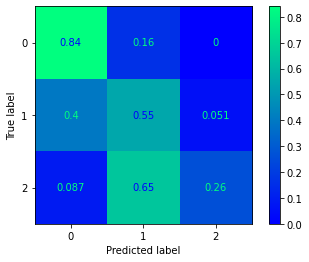

              precision    recall  f1-score   support

         0.0       0.67      0.84      0.74       138
         1.0       0.59      0.55      0.57       136
         2.0       0.63      0.26      0.37        46
		 R2 Score: 0.18121231355125367

SVM - Linear, Train Accuracy = 0.63721657544957, C=0.4
Test Accuracy = 0.63125


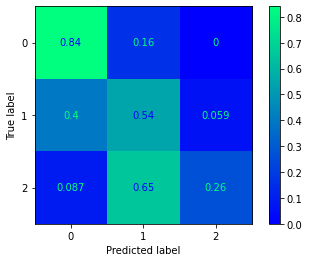

              precision    recall  f1-score   support

         0.0       0.67      0.84      0.74       138
         1.0       0.59      0.54      0.56       136
         2.0       0.60      0.26      0.36        46
		 R2 Score: 0.17486512218343386



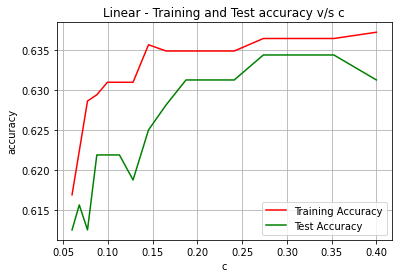

SVM - RBF, Train Accuracy = 0.709147771696638, C=1.0
Test Accuracy = 0.66875


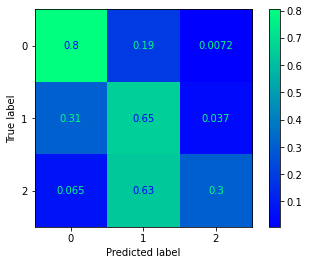

              precision    recall  f1-score   support

         0.0       0.71      0.80      0.76       138
         1.0       0.62      0.65      0.64       136
         2.0       0.70      0.30      0.42        46
		 R2 Score: 0.25103141859727074

SVM - RBF, Train Accuracy = 0.7154026583268178, C=1.2324856054625426
Test Accuracy = 0.66875


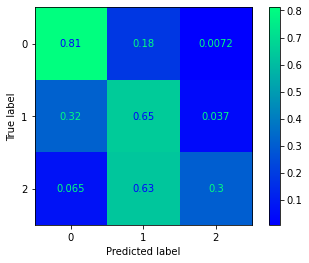

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       138
         1.0       0.62      0.65      0.63       136
         2.0       0.70      0.30      0.42        46
		 R2 Score: 0.25103141859727074

SVM - RBF, Train Accuracy = 0.7224394057857702, C=1.5190207676723702
Test Accuracy = 0.675


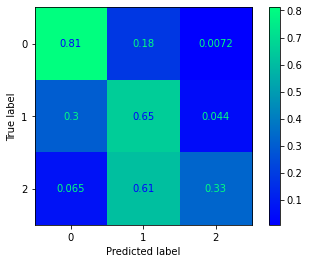

              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76       138
         1.0       0.63      0.65      0.64       136
         2.0       0.68      0.33      0.44        46
		 R2 Score: 0.26372580133291024

SVM - RBF, Train Accuracy = 0.7349491790461298, C=1.8721712305548572
Test Accuracy = 0.678125


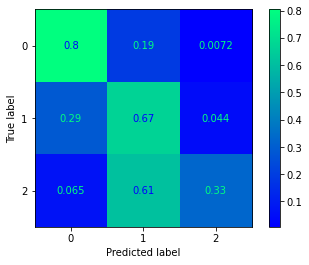

              precision    recall  f1-score   support

         0.0       0.73      0.80      0.76       138
         1.0       0.63      0.67      0.65       136
         2.0       0.68      0.33      0.44        46
		 R2 Score: 0.27007299270072993

SVM - RBF, Train Accuracy = 0.745113369820172, C=2.3074240926199567
Test Accuracy = 0.671875


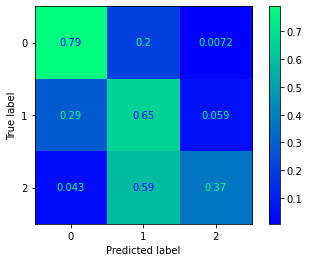

              precision    recall  f1-score   support

         0.0       0.73      0.79      0.76       138
         1.0       0.62      0.65      0.64       136
         2.0       0.65      0.37      0.47        46
		 R2 Score: 0.27642018406854973

SVM - RBF, Train Accuracy = 0.7544956997654417, C=2.8438669798515654
Test Accuracy = 0.665625


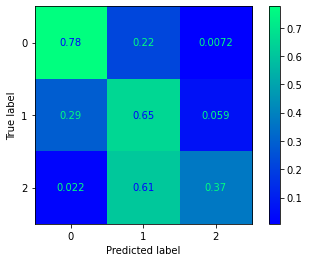

              precision    recall  f1-score   support

         0.0       0.73      0.78      0.75       138
         1.0       0.61      0.65      0.63       136
         2.0       0.65      0.37      0.47        46
		 R2 Score: 0.28276737543636943

SVM - RBF, Train Accuracy = 0.7670054730258014, C=3.5050251165172885
Test Accuracy = 0.66875


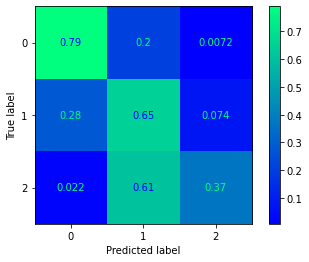

              precision    recall  f1-score   support

         0.0       0.74      0.79      0.76       138
         1.0       0.61      0.65      0.63       136
         2.0       0.61      0.37      0.46        46
		 R2 Score: 0.28911456680418923

SVM - RBF, Train Accuracy = 0.7709147771696638, C=4.31989300289223
Test Accuracy = 0.675


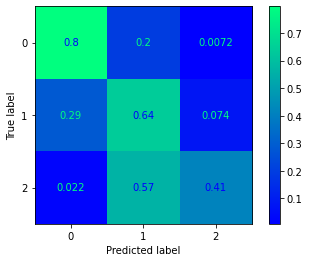

              precision    recall  f1-score   support

         0.0       0.73      0.80      0.76       138
         1.0       0.62      0.64      0.63       136
         2.0       0.63      0.41      0.50        46
		 R2 Score: 0.30180894953982873

SVM - RBF, Train Accuracy = 0.7802971071149335, C=5.32420594320303
Test Accuracy = 0.675


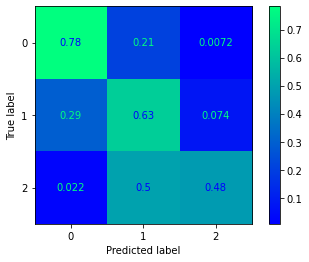

              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75       138
         1.0       0.62      0.63      0.63       136
         2.0       0.67      0.48      0.56        46
		 R2 Score: 0.30180894953982873

SVM - RBF, Train Accuracy = 0.7920250195465207, C=6.562007185515855
Test Accuracy = 0.675


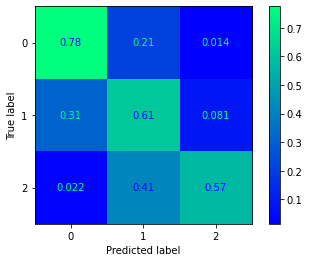

              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74       138
         1.0       0.63      0.61      0.62       136
         2.0       0.67      0.57      0.61        46
		 R2 Score: 0.28276737543636943

SVM - RBF, Train Accuracy = 0.8076622361219703, C=8.087579399090064
Test Accuracy = 0.690625


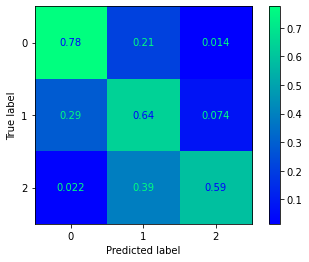

              precision    recall  f1-score   support

         0.0       0.73      0.78      0.75       138
         1.0       0.65      0.64      0.64       136
         2.0       0.69      0.59      0.64        46
		 R2 Score: 0.3145033322754681

SVM - RBF, Train Accuracy = 0.8115715402658327, C=9.967825192413903
Test Accuracy = 0.671875


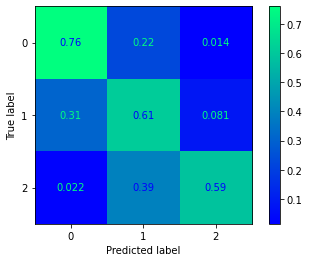

              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73       138
         1.0       0.63      0.61      0.62       136
         2.0       0.68      0.59      0.63        46
		 R2 Score: 0.27642018406854973

SVM - RBF, Train Accuracy = 0.8209538702111024, C=12.285201067417033
Test Accuracy = 0.671875


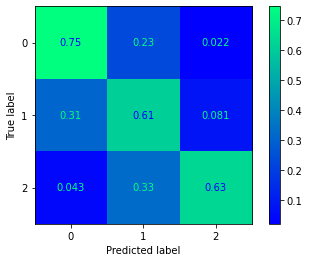

              precision    recall  f1-score   support

         0.0       0.70      0.75      0.72       138
         1.0       0.64      0.61      0.62       136
         2.0       0.67      0.63      0.65        46
		 R2 Score: 0.23833703586163124

SVM - RBF, Train Accuracy = 0.8272087568412823, C=15.141333475804554
Test Accuracy = 0.675


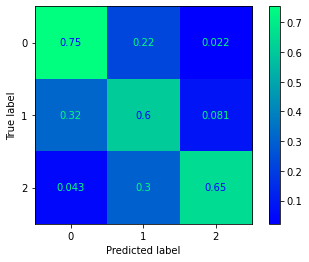

              precision    recall  f1-score   support

         0.0       0.70      0.75      0.72       138
         1.0       0.65      0.60      0.62       136
         2.0       0.68      0.65      0.67        46
		 R2 Score: 0.24468422722945105

SVM - RBF, Train Accuracy = 0.8358092259577795, C=18.66147555643725
Test Accuracy = 0.671875


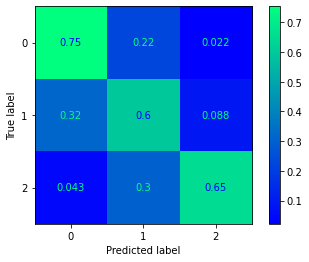

              precision    recall  f1-score   support

         0.0       0.70      0.75      0.72       138
         1.0       0.64      0.60      0.62       136
         2.0       0.67      0.65      0.66        46
		 R2 Score: 0.23833703586163124

SVM - RBF, Train Accuracy = 0.8467552775605942, C=23.0
Test Accuracy = 0.6625


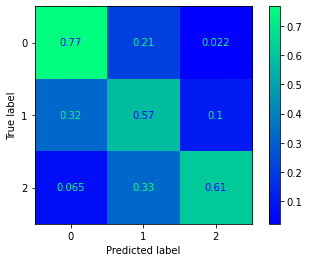

              precision    recall  f1-score   support

         0.0       0.69      0.77      0.73       138
         1.0       0.64      0.57      0.60       136
         2.0       0.62      0.61      0.62        46
		 R2 Score: 0.20025388765471286



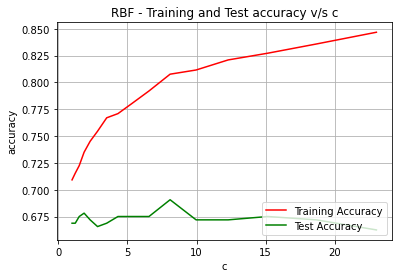

SVM - Poly, Train Accuracy = 0.5903049257232212, C=0.1
Test Accuracy = 0.53125


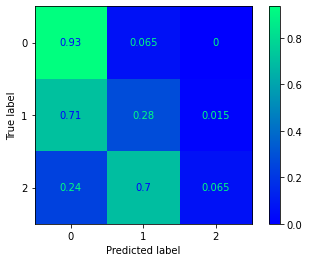

              precision    recall  f1-score   support

         0.0       0.55      0.93      0.69       138
         1.0       0.48      0.28      0.35       136
         2.0       0.60      0.07      0.12        46
		 R2 Score: -0.16153602031101233

SVM - Poly, Train Accuracy = 0.6137607505863957, C=0.151332195791627
Test Accuracy = 0.54375


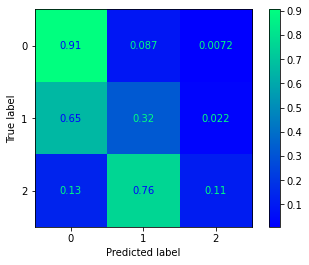

              precision    recall  f1-score   support

         0.0       0.57      0.91      0.70       138
         1.0       0.48      0.32      0.39       136
         2.0       0.56      0.11      0.18        46
		 R2 Score: -0.05998095842589657

SVM - Poly, Train Accuracy = 0.6286161063330727, C=0.22901433483115327
Test Accuracy = 0.553125


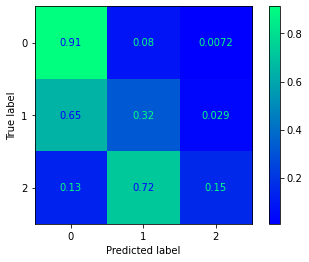

              precision    recall  f1-score   support

         0.0       0.57      0.91      0.70       138
         1.0       0.50      0.32      0.39       136
         2.0       0.58      0.15      0.24        46
		 R2 Score: -0.04093938432243727

SVM - Poly, Train Accuracy = 0.6544175136825645, C=0.3465724215775732
Test Accuracy = 0.578125


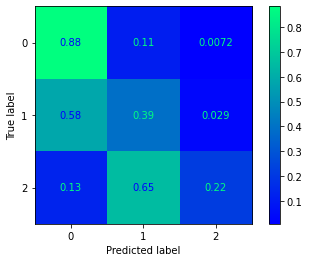

              precision    recall  f1-score   support

         0.0       0.59      0.88      0.71       138
         1.0       0.54      0.39      0.45       136
         2.0       0.67      0.22      0.33        46
		 R2 Score: 0.009838146620120614

SVM - Poly, Train Accuracy = 0.6778733385457388, C=0.524475655581556
Test Accuracy = 0.60625


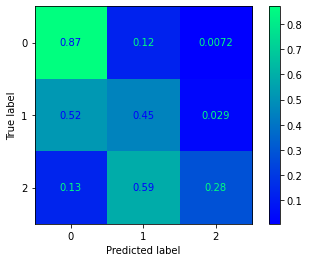

              precision    recall  f1-score   support

         0.0       0.61      0.87      0.72       138
         1.0       0.58      0.45      0.51       136
         2.0       0.72      0.28      0.41        46
		 R2 Score: 0.0669628689304983

SVM - Poly, Train Accuracy = 0.6927286942924159, C=0.7937005259840996
Test Accuracy = 0.63125


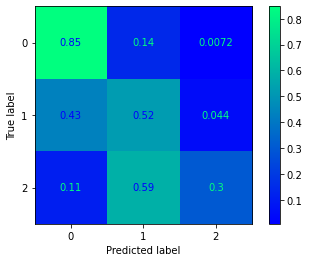

              precision    recall  f1-score   support

         0.0       0.65      0.85      0.73       138
         1.0       0.60      0.52      0.56       136
         2.0       0.67      0.30      0.42        46
		 R2 Score: 0.13678197397651548

SVM - Poly, Train Accuracy = 0.7122752150117279, C=1.201124433981431
Test Accuracy = 0.646875


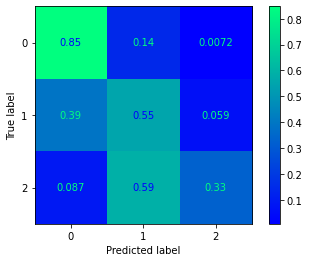

              precision    recall  f1-score   support

         0.0       0.67      0.85      0.75       138
         1.0       0.61      0.55      0.58       136
         2.0       0.62      0.33      0.43        46
		 R2 Score: 0.18755950491907336

SVM - Poly, Train Accuracy = 0.7294761532447225, C=1.8176879801338506
Test Accuracy = 0.65625


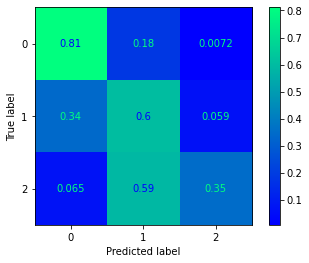

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       138
         1.0       0.61      0.60      0.61       136
         2.0       0.64      0.35      0.45        46
		 R2 Score: 0.22564265312599185

SVM - Poly, Train Accuracy = 0.7490226739640344, C=2.7507471329770294
Test Accuracy = 0.64375


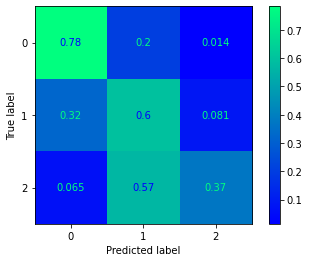

              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74       138
         1.0       0.60      0.60      0.60       136
         2.0       0.57      0.37      0.45        46
		 R2 Score: 0.18121231355125367

SVM - Poly, Train Accuracy = 0.7498045347928068, C=4.162766037009366
Test Accuracy = 0.646875


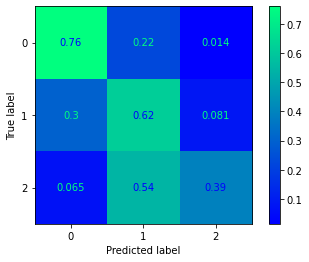

              precision    recall  f1-score   support

         0.0       0.70      0.76      0.73       138
         1.0       0.60      0.62      0.61       136
         2.0       0.58      0.39      0.47        46
		 R2 Score: 0.18755950491907336

SVM - Poly, Train Accuracy = 0.7591868647380766, C=6.2996052494743635
Test Accuracy = 0.653125


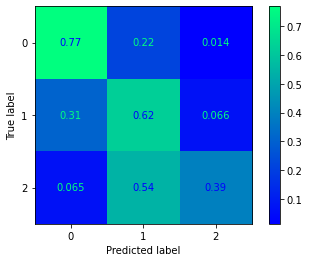

              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73       138
         1.0       0.61      0.62      0.62       136
         2.0       0.62      0.39      0.48        46
		 R2 Score: 0.20025388765471286

SVM - Poly, Train Accuracy = 0.7677873338545739, C=9.533330950234157
Test Accuracy = 0.6375


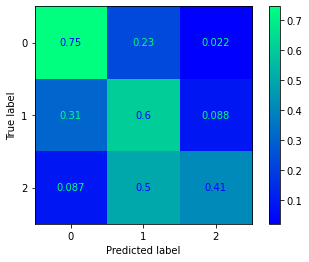

              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72       138
         1.0       0.60      0.60      0.60       136
         2.0       0.56      0.41      0.47        46
		 R2 Score: 0.13043478260869568

SVM - Poly, Train Accuracy = 0.781078967943706, C=14.426999059072134
Test Accuracy = 0.621875


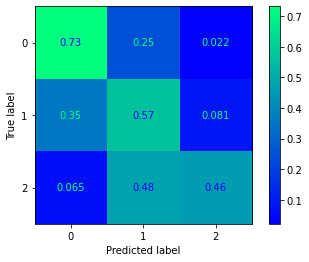

              precision    recall  f1-score   support

         0.0       0.66      0.73      0.70       138
         1.0       0.58      0.57      0.57       136
         2.0       0.60      0.46      0.52        46
		 R2 Score: 0.11774039987305629

SVM - Poly, Train Accuracy = 0.7849882720875684, C=21.832694462931222
Test Accuracy = 0.63125


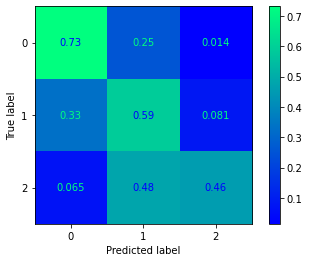

              precision    recall  f1-score   support

         0.0       0.68      0.73      0.70       138
         1.0       0.58      0.59      0.59       136
         2.0       0.62      0.46      0.52        46
		 R2 Score: 0.15582354807997467

SVM - Poly, Train Accuracy = 0.7951524628616107, C=33.039895931230774
Test Accuracy = 0.6375


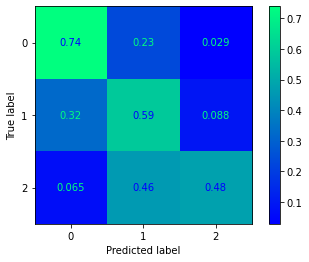

              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71       138
         1.0       0.60      0.59      0.59       136
         2.0       0.58      0.48      0.52        46
		 R2 Score: 0.13043478260869568

SVM - Poly, Train Accuracy = 0.8060985144644254, C=50.0
Test Accuracy = 0.640625


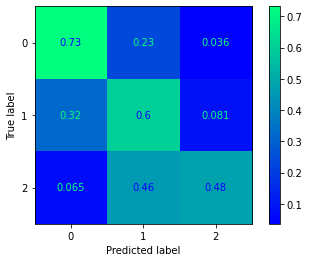

              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71       138
         1.0       0.61      0.60      0.61       136
         2.0       0.58      0.48      0.52        46
		 R2 Score: 0.11774039987305629



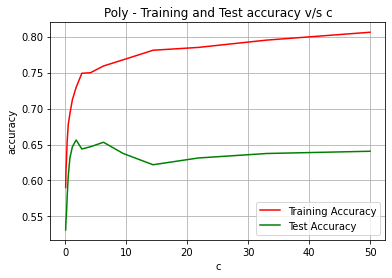

In [882]:
train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)